In [3]:
import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from custom_scripts import database
from custom_scripts import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sample_number = 1000
flights_query =  f"""
                SELECT * FROM flights ORDER BY RANDOM() LIMIT '{sample_number}';
                """

flights = database.query(flights_query)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-10-29,AA,AA_CODESHARE,AA,5519,OH,N573NN,5519,11057,CLT,...,118.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-07-30,DL,DL,DL,1360,DL,N972DL,1360,10599,BHM,...,134.0,16.0,0.0,0.0,0.0,139.0,None,NaN,NaN,None
2,2019-05-28,DL,DL_CODESHARE,DL,5936,YX,N809MD,5936,14100,PHL,...,280.0,185.0,0.0,25.0,0.0,0.0,None,NaN,NaN,None
3,2019-08-07,UA,UA_CODESHARE,UA,4350,EV,N16541,4350,13061,LRD,...,301.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-05-10,DL,DL,DL,2716,DL,N342NW,2716,11433,DTW,...,405.0,28.0,0.0,2.0,0.0,0.0,None,NaN,NaN,None


In [6]:
import pandas as pd
DelayDate = flights[["fl_date","arr_delay"]]
DelayDate = DelayDate.fillna(0)
DelayDate = DelayDate.assign(month = pd.DatetimeIndex(DelayDate['fl_date']).month)

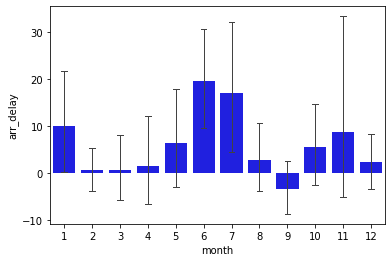

In [7]:
sns.barplot(x=DelayDate.month,y=DelayDate.arr_delay, color='blue', capsize = 0.2, errwidth = 1)
plt.show()

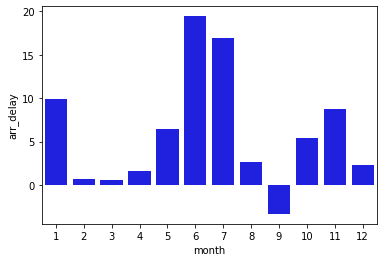

In [8]:
DelayMonth = DelayDate.groupby(by='month').mean().reset_index()
sns.barplot(x=DelayMonth.month, y= DelayMonth.arr_delay, color ='blue')
plt.show()

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

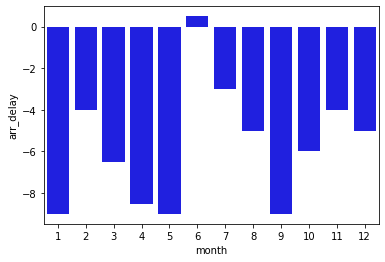

In [9]:
DelayMonth = DelayDate.groupby(by='month').median().reset_index()
sns.barplot(x=DelayMonth.month, y= DelayMonth.arr_delay, color ='blue')

In [10]:
# I repeated the above charts few times with 1000 samples. The pattern are the same but apparantly
# needs larger sampling to converge

In [11]:
# I am doing the same study here but with larger sample (1000 sample for each month) for the span of
# two years to check for seasonality

In [28]:
sample_number = 24000
flights_query =  f"""
                SELECT * FROM flights ORDER BY RANDOM() LIMIT '{sample_number}';
                """

flights = database.query(flights_query)
flights.head()



,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-18,AS,AS_CODESHARE,AS,2839,QX,N633QX,2839,13851,OKC,...,1519.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-05-05,UA,UA_CODESHARE,UA,5652,OO,N103SY,5652,13930,ORD,...,403.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-10-07,UA,UA_CODESHARE,UA,3657,YX,N644RW,3657,11618,EWR,...,725.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-01-30,AS,AS_CODESHARE,AS,2474,QX,N414QX,2474,15023,STS,...,489.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
4,2018-04-15,UA,UA,UA,651,UA,N75426,651,13930,ORD,...,1723.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [29]:
import pandas as pd
import numpy as np
import datetime
DelayDate = flights[["fl_date","arr_delay"]]
DelayDate = DelayDate.fillna(0)
DelayDate = DelayDate.assign(month_year = pd.to_datetime(DelayDate['fl_date']).dt.to_period('M'))
DelayDate = DelayDate.sort_values(by='month_year').reset_index()

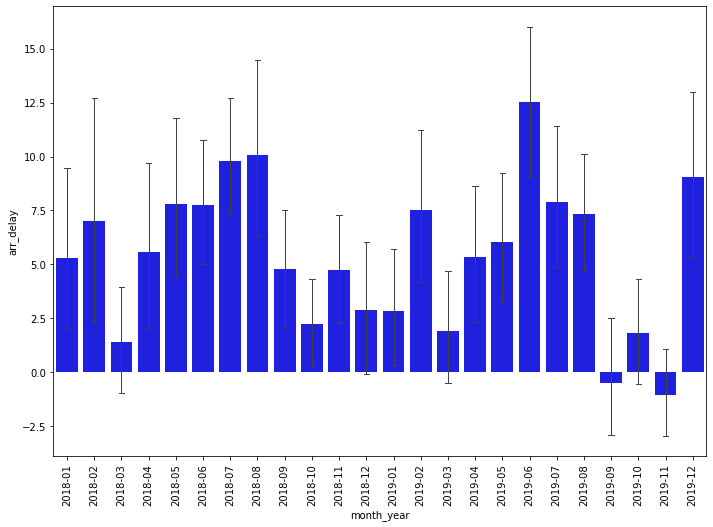

In [30]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x=DelayDate.month_year,y=DelayDate.arr_delay, color='blue', capsize = 0.2, errwidth = 1)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Guys, I don't see a seasonal pattern for January over two years. Of course, to make sure this bar chart converge 
# (and those scale bars reduces) we need to try larger sampling but as I try this kind of sampling for
# different problems, I see the pattarn remains similar but starts getting converged